In [1]:
import pandas as pd

# Load the CSV file to inspect the first few rows and get a summary of the data
file_path = 'processed_full_loaded.csv'
data = pd.read_csv(file_path)

# Display the first few rows and a summary of the dataset
data_head = data.head()
data_info = data.info()
data_head, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297663 entries, 0 to 297662
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   filename  297663 non-null  object 
 1   distance  297663 non-null  float64
 2   label     297663 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 6.8+ MB


(           filename  distance  label
 0  id6_id2_0003.mp4  0.419708      0
 1  id6_id2_0003.mp4  0.336302      0
 2  id6_id2_0003.mp4  0.469395      0
 3  id6_id2_0003.mp4  0.376440      0
 4  id6_id2_0003.mp4  0.404028      0,
 None)

In [2]:
# Generate descriptive statistics for numeric columns
descriptive_stats = data.describe()

# Analyze the distribution of the 'label' column
label_distribution = data['label'].value_counts()

# Check the number of unique files
unique_files_count = data['filename'].nunique()

descriptive_stats, label_distribution, unique_files_count

(            distance          label
 count  297663.000000  297663.000000
 mean        0.410132       0.149810
 std         0.189983       0.356886
 min         0.000000       0.000000
 25%         0.297282       0.000000
 50%         0.365135       0.000000
 75%         0.456918       0.000000
 max         1.556806       1.000000,
 label
 0    253070
 1     44593
 Name: count, dtype: int64,
 6529)

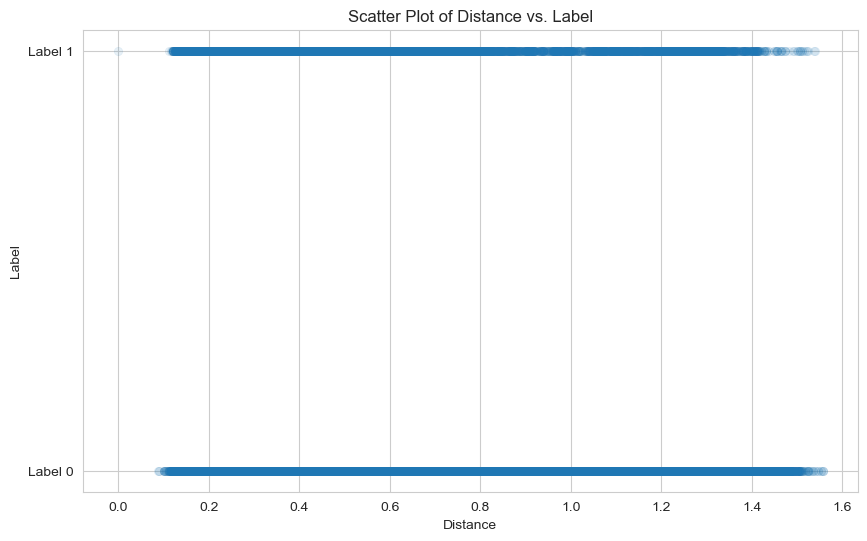

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a scatter plot to explore the relationship between 'distance' and 'label'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='distance', y='label', alpha=0.1, edgecolor=None)
plt.title('Scatter Plot of Distance vs. Label')
plt.xlabel('Distance')
plt.ylabel('Label')
plt.yticks([0, 1], ['Label 0', 'Label 1'])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


# Identify the number of samples for label == 1
num_label_1 = data[data['label'] == 1].shape[0]

# Randomly sample entries from label == 0 to match the number of label == 1 entries
data_label_0_sampled = data[data['label'] == 0].sample(n=num_label_1, random_state=42)

# Combine the sampled label 0 entries with the label 1 entries to form a balanced dataset
balanced_data = pd.concat([data[data['label'] == 1], data_label_0_sampled])

# Splitting the balanced dataset into training and testing sets
X_balanced = balanced_data[['distance']]  # Features
y_balanced = balanced_data['label']       # Target variable

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42)




In [6]:


# Create an SVM classifier with an RBF kernel
svm_classifier_balanced = SVC(kernel='linear', random_state=42)

# Train the classifier on the balanced training dataset
svm_classifier_balanced.fit(X_train_balanced, y_train_balanced)



In [ ]:


# Predicting the test set results
y_pred_balanced = svm_classifier_balanced.predict(X_test_balanced)

# Calculate accuracy and confusion matrix
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)

accuracy_balanced, conf_matrix_balanced


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into features and target variable
X = data[['distance']]  # Features (we use a DataFrame to keep the input as 2D for sklearn)
y = data['label']       # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier with an RBF kernel
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix
